# Demonstration of perplexity optimization in t-SNE (t-distributed Stochastic Neighbor Embedding) using k3n-error

Hiromasa Kaneko

For more details, https://www.sciencedirect.com/science/article/pii/S0169743918300698

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_swiss_roll, make_s_curve
from sklearn.manifold import TSNE
import mpl_toolkits.mplot3d

import k3nerror

In [2]:
data_flag = 1  # 1: s-curve dataset, 2: swiss-roll dataset

k_in_k3nerror = 10
candidates_of_perplexity = np.arange(5, 125, 5, dtype=int)
number_of_samples = 500
noise = 0
random_state_number = 100

In [3]:
if data_flag == 1:
    original_X, color = make_s_curve(number_of_samples, noise, random_state=0)
elif data_flag == 2:
    original_X, color = make_swiss_roll(number_of_samples, noise, random_state=0)

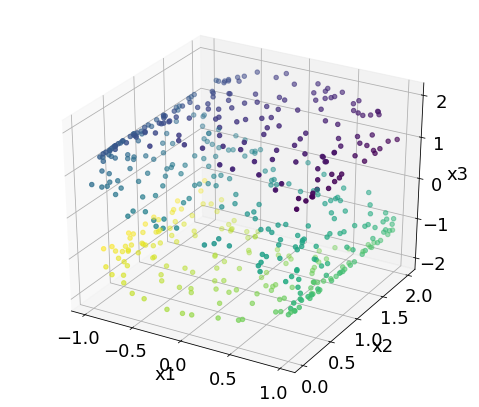

In [4]:
# plot
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
p = ax.scatter(original_X[:, 0], original_X[:, 1], original_X[:, 2], c=color)
#fig.colorbar(p)
plt.tight_layout()
plt.show()

In [ ]:
autoscaled_X = (original_X - original_X.mean(axis=0)) / original_X.std(axis=0, ddof=1)

In [ ]:
k3nerrors = list()
for perplexity in candidates_of_perplexity:
    Z_in_perplexity_optimization = TSNE(perplexity=perplexity, n_components=2, init='pca',
                                        random_state=random_state_number).fit_transform(autoscaled_X)
    scaled_Z_in_perplexity_optimization = (Z_in_perplexity_optimization - Z_in_perplexity_optimization.mean(
        axis=0)) / Z_in_perplexity_optimization.std(axis=0, ddof=1)

    k3nerrors.append(
        k3nerror.k3nerror(autoscaled_X, scaled_Z_in_perplexity_optimization, k_in_k3nerror) + k3nerror.k3nerror(
            scaled_Z_in_perplexity_optimization, autoscaled_X, k_in_k3nerror))

In [ ]:
plt.plot(candidates_of_perplexity, k3nerrors, "b.")
plt.xlabel("perplexity")
plt.ylabel("k3n-errors")
plt.show()

In [ ]:
optimal_perplexity = candidates_of_perplexity[np.where(k3nerrors == np.min(k3nerrors))[0][0]]

In [ ]:
Z = TSNE(perplexity=optimal_perplexity, n_components=2, init='pca',
         random_state=random_state_number).fit_transform(autoscaled_X)

In [ ]:
# plot after tSNE
plt.figure(figsize=(6, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=color)
plt.xlabel("z1")
plt.ylabel("z2")
plt.tight_layout()
plt.show()

In [ ]:
print('optimal perplexity : {0}'.format(optimal_perplexity))